In [ ]:
%%html
<style>
div.input {
    display:none;
}
</style>
... *(clear this cell to run it again)* ...

# Analysis of S-layers crystallization kinetics monitored with tr-SAXS

Jonathan Hermann, Frédéric Poitevin, ...

## Introduction

We consider here time-series collected after addition of Calcium on RsaA monomers, thus following the subsequent crystallization process. 

We aim at extracting the underlying components of the SAXS profiles, and their evolution with time.




## Methods

We start by considering the dataset with higher concentration (33.7mg/ml). We edited out the first time-points.

In [94]:
# Useful libraries
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np
from numpy import genfromtxt
from sklearn.decomposition import FastICA, PCA

In [358]:
# Data loading
filename='../data/33_q.csv'
raw_q = genfromtxt(filename,delimiter=',')
filename='../data/33_t.csv'
raw_t = genfromtxt(filename,delimiter=',')
filename='../data/33_array.csv'
raw_data = genfromtxt(filename, delimiter=',')
print("Raw data size (q,t,I(q,t)) = ",raw_q.shape,raw_t.shape,raw_data.shape)
# we prepare the variables if we need to alter the raw variables
# and we alter it a qmax tmax
qlen = len(raw_q)
qmin = int(qlen*(5/100)) #0 #int(qlen*(1/100))
qmax = int(qlen*(1/2)) # int(qlen*(3/4)) # int(qlen*(1/2))
tlen = len(raw_t)
tmin = 0 #int(tlen*(1/4))
tmax = int(tlen*(1))
q = raw_q[qmin:qmax]
t = raw_t[tmin:tmax]
data = np.log(raw_data[qmin:qmax,tmin:tmax])
print("New data size (q,t,I(q,t)) = ",q.shape,t.shape,data.shape)

Raw data size (q,t,I(q,t)) =  (791,) (153,) (791, 153)
New data size (q,t,I(q,t)) =  (356,) (153,) (356, 153)


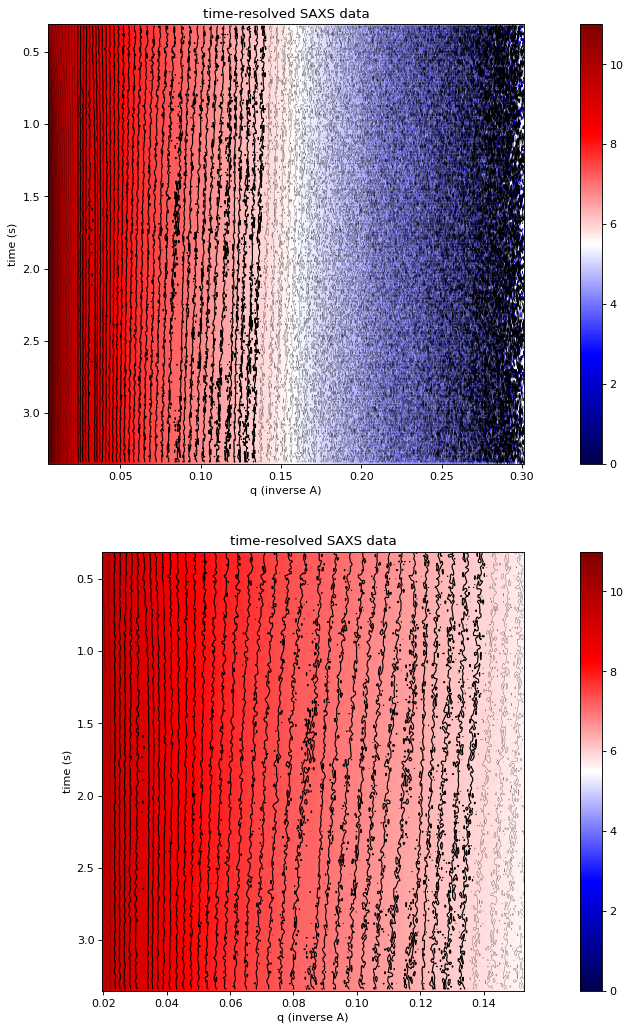

In [359]:
levels1 = np.arange(0,6.5,0.1)
levels2 = np.arange(6,9.5,0.1)
levels3 = np.arange(9.5,15,0.1)
raw_extent=[np.min(raw_q),np.max(raw_q),np.max(raw_t),np.min(raw_t)]
extent=[np.min(q),np.max(q),np.max(t),np.min(t)]
origin='upper'
raw_aspect=max(raw_q)/max(raw_t)
aspect=max(q)/max(t)
plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')
#
plt.subplot(211)
plt.title('time-resolved SAXS data')
plt.xlabel('q (inverse A)')
plt.ylabel('time (s)')
plt.imshow(np.log(raw_data.T), cmap='seismic',vmin=0,vmax=11,origin=origin,extent=raw_extent,aspect=raw_aspect)
plt.colorbar()
plt.contour(np.log(raw_data.T), levels1, linewidths=0.2,colors='k', origin=origin,extent=raw_extent)
plt.contour(np.log(raw_data.T), levels2, linewidths=1,colors='k', origin=origin,extent=raw_extent)
plt.contour(np.log(raw_data.T), levels3, linewidths=0.2,colors='k', origin=origin,extent=raw_extent)
#
#plt.subplot(212)
#plt.title('time-resolved SAXS data')
#plt.xlabel('q (inverse A)')
#plt.ylabel('time (s)')
#plt.imshow(np.log(data.T), cmap='seismic',vmin=0,vmax=11,origin=origin,extent=extent,aspect=aspect)
#plt.colorbar()
#plt.contour(np.log(data.T), levels1, linewidths=0.2,colors='k', origin=origin,extent=extent)
#plt.contour(np.log(data.T), levels2, linewidths=1,colors='k', origin=origin,extent=extent)
#plt.contour(np.log(data.T), levels3, linewidths=0.2,colors='k', origin=origin,extent=extent)
#
plt.subplot(212)
plt.title('time-resolved SAXS data')
plt.xlabel('q (inverse A)')
plt.ylabel('time (s)')
plt.imshow(data.T, cmap='seismic',vmin=0,vmax=11,origin=origin,extent=extent,aspect=aspect)
plt.colorbar()
plt.contour(data.T, levels1, linewidths=0.2,colors='k', origin=origin,extent=extent)
plt.contour(data.T, levels2, linewidths=1,colors='k', origin=origin,extent=extent)
plt.contour(data.T, levels3, linewidths=0.2,colors='k', origin=origin,extent=extent)
#
plt.show()


The data is shown above on a log scale contoured in steps of 1/10, with an emphasis on the area that see Bragg peaks appearing with time.

### 1. PCA

We start by performing the PCA of the data.

In [360]:
# Compute PCA
pca = PCA(n_components=10)
H = pca.fit_transform(data.T)  # Reconstruct signals based on orthogonal components
#proj = pca.transform(data.T)

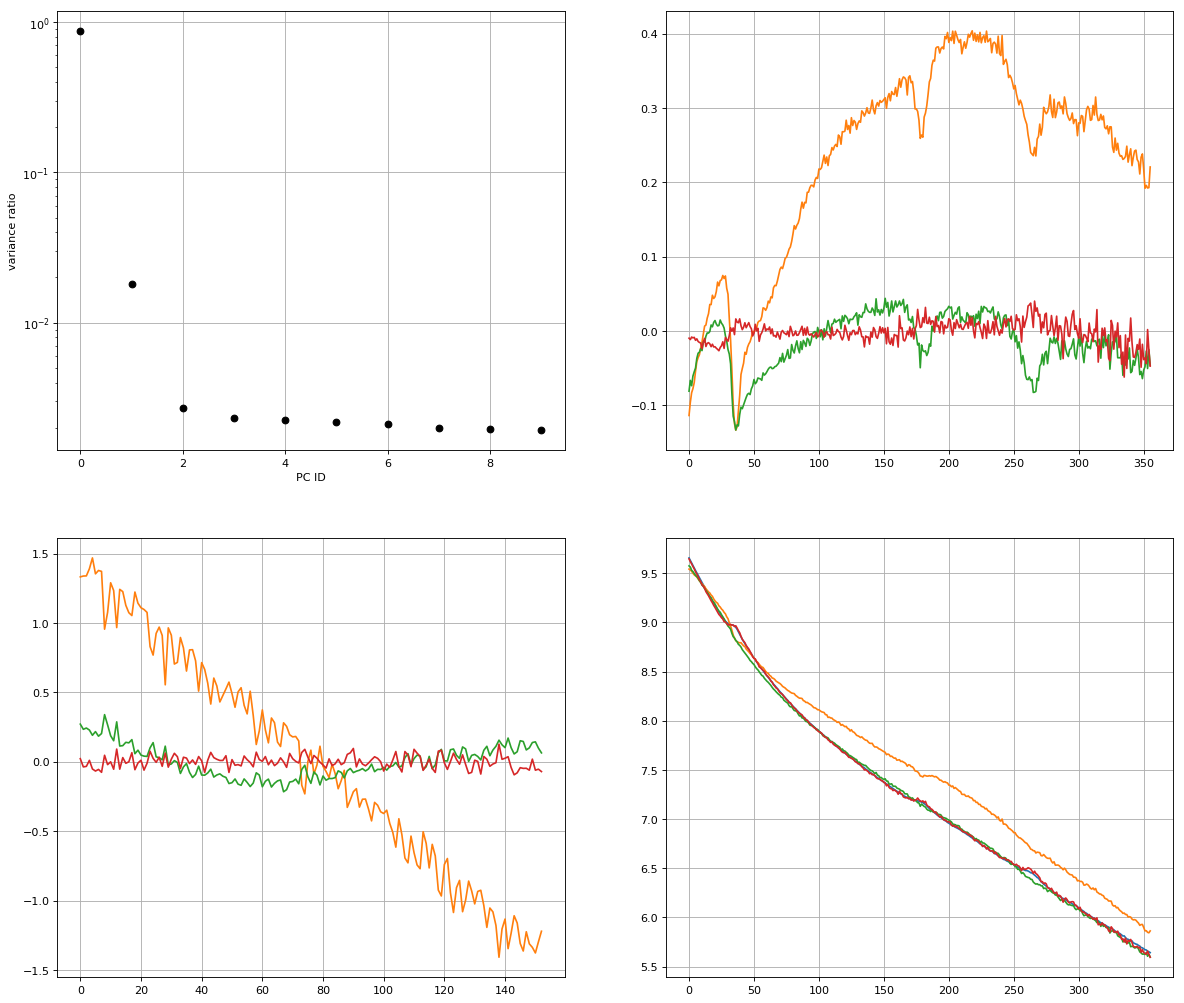

In [374]:
# parameters for figure below
nPCs = 3
#
plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')
plt.subplot(221)
plt.grid()
plt.xlabel('PC ID')
plt.ylabel('variance ratio')
plt.semilogy(pca.explained_variance_ratio_, 'ko')
plt.subplot(222)
plt.grid()
plt.plot(0)
for i in np.arange(0,nPCs,1):
    plt.plot((pca.singular_values_[i]/2)*pca.components_.T[:,i])
plt.subplot(223)
plt.grid()
plt.plot(0)
for i in np.arange(0,nPCs,1):
    plt.plot(pca.transform(data.T)[:,i])
plt.subplot(224)
plt.grid()
plt.plot(pca.mean_)
for i in np.arange(0,nPCs,1):
    plt.plot(pca.mean_ + (pca.singular_values_[i]/2)*pca.components_.T[:,i])
plt.show()

#### 1. fastICA

...

In [362]:
# Compute ICA
ica = FastICA(n_components=3)
S_ = ica.fit_transform(data)  # Reconstruct signals
A_ = ica.mixing_  # Get estimated mixing matrix

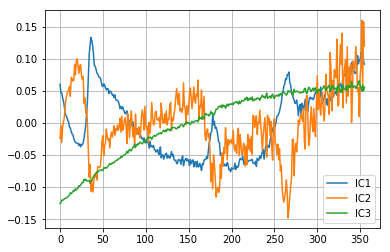

In [363]:
#S_
plt.figure()
plt.grid()
labels = ['IC1', 'IC2', 'IC3']
for y_arr, label in zip(S_.T, labels):
    plt.plot(y_arr, label=label)
plt.legend()
plt.show()

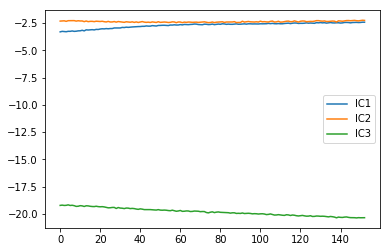

In [364]:
#A_
plt.figure()
labels = ['IC1', 'IC2', 'IC3']
for y_arr, label in zip(A_.T, labels):
    plt.plot(y_arr, label=label)
plt.legend()
plt.show()

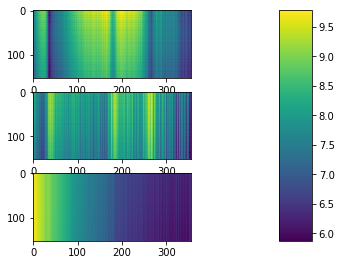

In [366]:
i=0
plt.subplot(311)
plt.imshow((np.outer(S_[:,i], A_[:,i].T)+ica.mean_).T)
plt.subplot(312)
plt.imshow((np.outer(S_[:,i+1], A_[:,i+1].T)+ica.mean_).T)
plt.subplot(313)
plt.imshow((np.outer(S_[:,i+2], A_[:,i+2].T)+ica.mean_).T)

plt.subplots_adjust(bottom=0.1, right=0.8, top=0.9)
cax = plt.axes([0.85, 0.1, 0.075, 0.8])
plt.colorbar(cax=cax)
plt.show()

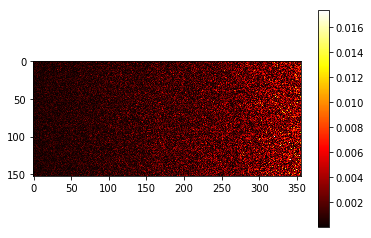

In [369]:
### show residual
#plt.semilogy(abs(1-(np.dot(S_, A_.T) + ica.mean_)/data))
#plt.imshow(np.log(abs(1-(np.dot(S_, A_.T) + ica.mean_)/data)).T, cmap='hot',origin='upper')
plt.imshow(abs(1-(np.dot(S_, A_.T) + ica.mean_)/data).T, cmap='hot',origin='upper')
plt.colorbar()
plt.show()